In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
#import needed things

#Part 1

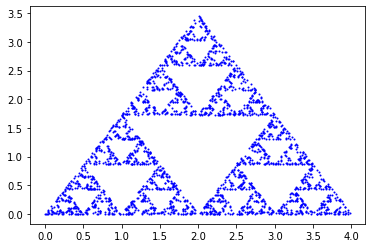

In [91]:
def midpoint(P, Q):
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1]))
#avg of the inputs and the outpus

vertices = [(0, 0), (2,2*np.sqrt(3)), (4, 0)]
n = 2500 # Change this value and see what happens
#creates a triangle w the given verticies

x = [0]*n #creates two lists with n slots and fills the first slots with random numbers
y = [0]*n
x[0] = random()
y[0] = random()

for i in range(1, n):
    x[i], y[i] = midpoint( vertices[randint(0, 2)], (x[i-1], y[i-1])) #fills the rest of the list with the values obtained from the midpoints
plt.scatter(x, y, color = 'b', s=1) #plots
#woah its serpenskis triangle

In [ ]:
#Bonus: Try to extend this code to create patterns like these

<img src ='http://math.hws.edu/eck/js/chaos-game/exercises.png'>



# Part 2

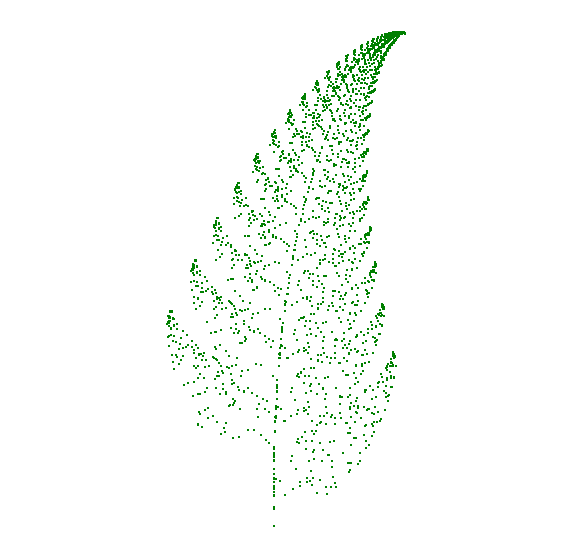

In [94]:
# Barnsley's Fern
# 1% of the time:x → 0,y → 0.16 y
# 85% of the time:x → 0.85 x + 0.04 y, y → −0.04 x + 0.05 y + 1.6
# 7% of the time:x → 0.2 x − 0.26 y, y → 0.23 x + 0.22 y + 1.6
# 7% of the time:x → −0.15 x + 0.28 y, y → 0.26 x + 0.24 y + 0.44
def pick(p):
    c = np.cumsum(p)
    return bisect(c, np.random.random() * c[-1]) #randomly bisects the matrix
p = np.array([0.01,0.07,0.07,0.85])
eq = [np.array([[0,0,0],[0,0.16,0]]),
      np.array([[0.2,-0.26,0],[0.23,0.22,1.6]]),
      np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]]), #defines matrix
      np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])]
n = 2500 # Change this value and see what happens
x = np.zeros((n,3))
x[:,2] = 1  #makes an n by 3 matrix of 0's and then changes the last column to 1's
for i in range(1,n):
    x[i,:2] = np.matmul(eq[pick(p)],x[i-1,:]) #multiplies the two matricies and make the last column of x the resulting values
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:, 1], s=3, c="g", marker="s", linewidths=0)
plt.axis("equal"),plt.axis("off"); #plots the values
#Woah its a fern!